# Data 11800 - Autumn 2022
# Homework 7: A/B testing and fuzzy matching (50 points)

**Reading**: Textbook chapter [12](https://inferentialthinking.com/chapters/12/Comparing_Two_Samples.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Homework 7 is due Thursday, December 1 at 9:00am. Late work will not be accepted.  

In [64]:
# Don't change this cell; just run it. 

import numpy as np
import pandas as pd

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# 1. Possum metrology (25 points) 

The data for this exercise were collected in Australia and New Guinea and represent various measurements of possum dimensions of 102 animals caught at 7 locations in Victoria, New South Wales, and Queensland in October and November of 1993. Source of data: 

Lindenmayer, D. B., Viggers, K. L., Cunningham, R. B., and Donnelly, C. F. 1995. Morphological variation among columns of the mountain brushtail possum, Trichosurus caninus Ogilby (Phalangeridae: Marsupiala). Australian Journal of Zoology 43: 449-458. 

Variables in the dataset:

- site: one of seven locations where possums were trapped. The sites were, in order, Cambarville, Bellbird, Whian Whian, Byrangery, Conondale, Allyn River and Bulburin
- pop:  a factor which classifies the sites as Vic (for Victoria) and other (New South Wales or Queensland)
- sex: a factor with levels f female, m male
- age
- head_l:  head length
- skull_w:  skull width
- total_l: total length
- tail_l: tail length

We believe that the units for `age` is  years, for `head_l`, `skull_w` and `tail_l` are mm; possums are about 20 inches long so let's assume that `total_l` is in cm.  


In [65]:
# read the data
p_df = pd.read_csv("possum.csv")
p_df.head()

,site,pop,sex,age,head_l,skull_w,total_l,tail_l
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0


In [66]:
# some data summaries
p_df.describe()

,site,age,head_l,skull_w,total_l,tail_l
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000
mean,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615
std,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000
25%,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000
50%,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000
75%,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000


**Question 1.** Produce an adequately-labeled scatterplot of total length (y axis) vs. age (x axis). Explain why the plot has prominent vertical lines.

Text(0.5, 1.0, 'Possum Age vs Length')

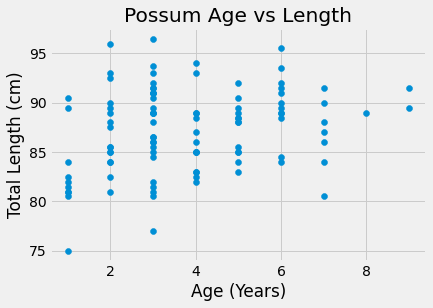

In [67]:
# code here
plt.scatter(p_df['age'], p_df['total_l'])
plt.xlabel('Age (Years)')
plt.ylabel('Total Length (cm)')
plt.title('Possum Age vs Length')

*Answer:* The plot has prominent vertical lines because the x-axis records age, which is recorded as integers and possoms tha were born within the same year but in different months are treated as the same age. 


**Question 2.** Test for sexual dimorphism in the skull width measurement in the sampled possums.  (Do the male and female possums have different skull widths?)  This should be done using the permutation method. Display the (permutation generated) null distribution of your test statistic and the observed value of the test statistic. Report the p-value for this null hypothesis that the two sexes have the same skull width distribution.

In [68]:
#  code here
# Test for sexual dimorphism:
male = p_df[p_df['sex'] == 'm']
female = p_df[p_df['sex']== 'f']
m_width = np.mean(male['skull_w'])
f_width = np.mean(female['skull_w'])
dif = m_width - f_width
print('Difference between Male and Female Skull width means in sample: ', dif)

Difference between Male and Female Skull width means in sample:  0.503431185665228


In [2]:
# permutation test
pd.options.mode.chained_assignment = None
def permute(ntime):
    things = []
    for i in range(ntime):
        df = p_df[['sex','skull_w']]
        sample = df.sample(n = 104, replace = False)
        vals = list(sample['sex'].values)
#        for i in range(len(vals)):
#            df.loc[i, 'sex2'] = vals[i]
        df['sex2'] = vals
        males = np.mean(df[df['sex2']=='m']['skull_w'])
        females = np.mean(df[df['sex2']=='f']['skull_w'])
        dif = males - females
        things = np.append(things, dif)
    return things
stuff = permute(5000)
plt.hist(stuff)
plt.title('Permutation Test for Possum Sex vs Skull Width')

#P-value calculation:
p_val = np.count_nonzero(stuff <= dif)/len(stuff)
print('P-value for the null hypothesis:', p_val)

NameError: name 'pd' is not defined

**Question 3.** Simlarly to Question 2, test the hypothesis of equality in distributions for the tail lengths of male possums sampled in Victoria (sites 1 and 2) and the tail lengths of male possums sampled outside of Victoria.

This should be done using the permutation method. Display the (permutation generated) null distribution of your test statistics and the observed value of the test statistic. Report the p-value for this null hypothesis that the two groups have the same tail length distribution.

In [70]:
# code here
# sample difference:
m_tails = p_df[p_df['sex']=='m'][['site','tail_l']]
smp_dif = np.mean(m_tails[m_tails['site'] < 3]['tail_l']) - np.mean(m_tails[m_tails['site']>2]['tail_l'])
print('Sample difference (Victoria - Not Victoria): ', smp_dif)

Sample difference (Victoria - Not Victoria):  -2.2564102564102555


P-value for Null Hypothesis: 0.0


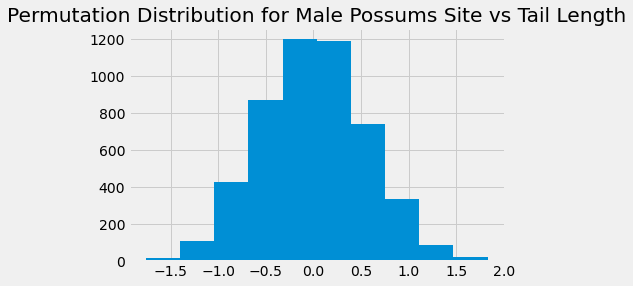

In [71]:
# permutation distribution
def perm(ntimes):
    values = []
    for i in range(ntimes):
        rand = list(m_tails.sample(replace=False, n=61)['site'])
        m_tails['samp'] = rand
        value = np.mean(m_tails[m_tails['samp'] < 3]['tail_l']) - np.mean(m_tails[m_tails['samp']>2]['tail_l'])
        values = np.append(values, value)
    return values
perms = perm(5000)
plt.hist(perms)
plt.title('Permutation Distribution for Male Possums Site vs Tail Length')
#p-value calculation
p_val = np.count_nonzero(perms <= smp_dif)/5000
print('P-value for Null Hypothesis:', p_val)

**Question 4.** Write code that constructs a 2x2 table that shows the counts of sex (female and male) in the two sites (Victoria and other)

In [1]:
# code here
#p_df.groupby(['sex','site']).count()
p_df.pivot_table('site',index = 'sex', columns = 'pop', aggfunc = 'count')

NameError: name 'p_df' is not defined

**Question 5.** Investigate the hypothesis that the porportion of males to females is equal in the two sites (perform a hypothesis test on the table you constructed in Question 4 using the permutation method). State clearly the null and alternative hypothesis. After you perform the test and report the p-value, briefly talk about the assumptions in your test.

In [73]:
# code here
smp_dif = 22/24 - 39/19
print('Sample difference (Vic - not Vic):', smp_dif)

#permutation
loc = p_df.site.values
sex = p_df.sex.values

def permute(ntimes):
    values = []
    for i in range(ntimes):
        rand_loc = np.random.permutation(loc)
        new_df = pd.DataFrame({"site":rand_loc, "sex":sex})
        not_vic = new_df[new_df['site'] >2]
        not_vic_dif = not_vic.groupby(['sex']).count()
        not_vic_ratio = not_vic_dif['site']['m']/not_vic_dif['site']['f']
        vic = new_df[new_df['site']<3]
        vic_dif = vic.groupby(['sex']).count()
        vic_ratio = vic_dif['site']['m']/vic_dif['site']['f']
        perm_dif = vic_ratio - not_vic_ratio
        values = np.append(values, perm_dif)
    return values
times = 1000
iterate = permute(times)
#p-value calculation:
p_val = np.count_nonzero(iterate < smp_dif)/times
p_val

Sample difference (Vic - not Vic): -1.135964912280702


0.006

*Answer here:*  
Null Hypothesis: The porportion of males to females is equal in the two sites  
Alternative Hypothesis: The porportion of males to females is greater in non-Victorian sites  
The p-value obtained is 0.011  
Assumptions: Some of the assumptions made were that male and female possums had equally likely chances to be born in either site, that the populations of the two sites have a fixed proportion to one another, and that there was a fixed total proportion of male to female possums. 

## 2. Plagiarism detector (25 points) 

We will use the matching techniques discussed in Lecture 16 to construct **a naive plagiarism detector**. We modified the code from the class notebook in two ways: (i) we generalized it to q-character tokens; and (ii) we use spaces instead of #-signs to pad the ends of the strings.

This code allows you to calculate the Jaccard similarity for bigrams, trigrams etc.

In [74]:
#A Function to break a string into qgrams (q-character tokens)
#we'll pad the string with spaces on the front and end
def qgram(str,q):
    str = ' ' + str + ' '
    return([str[i:i+q] for i in range(len(str)-(q-1))])

#compute the jaccard similarity of two strings using qgrams
#pass in a value for q to do anything other than bi-grams
#call jaccard_simq with verbose set to True to see intermediate values

def jaccard_simq(str1, str2,q=2,verbose=False): 
    set1 = set(qgram(str1,q)) 
    set2 = set(qgram(str2,q))
    common_tokens = set1.intersection(set2)
    all_tokens = set1.union(set2)
    if verbose:
        print('set1 =',set1)
        print('set2 =',set2)
        print('Intersection =',common_tokens)
        print('Union =',all_tokens)
        print('Common Tokens =',len(common_tokens),
              'Total Tokens =',len(all_tokens))
    return float(len(common_tokens) / len(all_tokens))


In [108]:
qgram('total',4)
jaccard_simq('hipster','asdnegsteemngape', q = 3, verbose = True)

set1 = {'ste', 'er ', ' hi', 'pst', 'ips', 'hip', 'ter'}
set2 = {'gst', 'ste', 'tee', 'nga', 'dne', ' as', 'eem', 'pe ', 'gap', 'egs', 'ape', 'sdn', 'mng', 'neg', 'emn', 'asd'}
Intersection = {'ste'}
Union = {'gst', 'ste', 'tee', 'neg', 'er ', 'eem', ' as', ' hi', 'gap', 'ape', 'ips', 'asd', 'nga', 'dne', 'pe ', 'emn', 'egs', 'pst', 'mng', 'sdn', 'hip', 'ter'}
Common Tokens = 1 Total Tokens = 22


0.045454545454545456

To familiarize yourself with the function, you should try it on several examples and with different values of q. The `verbose=True` option is useful when you want to understand what the function is doing.

In [76]:
jaccard_simq('the quick brown fox','fox quick brown the',verbose=True)

set1 = {'ui', 'n ', 'fo', 'ox', 'k ', 'th', 'e ', 'wn', 'x ', 'br', 'ro', 'ic', ' b', 'he', ' t', 'ck', ' f', 'ow', 'qu', ' q'}
set2 = {'ui', 'n ', 'fo', 'ox', 'k ', 'th', 'e ', 'wn', 'x ', 'br', 'ro', 'ic', ' b', 'he', ' t', 'ck', ' f', 'ow', 'qu', ' q'}
Intersection = {'ui', 'n ', 'fo', 'ox', 'k ', 'th', 'e ', 'wn', 'x ', 'br', 'ro', 'ic', ' b', 'he', ' t', 'ck', ' f', 'ow', 'qu', ' q'}
Union = {'ui', 'n ', 'fo', 'ox', 'k ', 'th', 'e ', 'wn', 'x ', 'br', 'ro', 'ic', ' b', 'he', ' t', 'ck', ' f', 'ow', 'qu', ' q'}
Common Tokens = 20 Total Tokens = 20


1.0

In [107]:
jaccard_simq('the quick brown fox','fox quick brown the')
len('the quick brown fox')

19

In [78]:
jaccard_simq('the quick brown fox','fox quick brown the',4,True)

set1 = {'e qu', 'wn f', 'the ', ' the', 'uick', 'quic', 'he q', ' bro', ' qui', 'rown', 'fox ', 'ick ', 'n fo', ' fox', 'k br', 'own ', 'ck b', 'brow'}
set2 = {' the', 'n th', 'uick', 'the ', 'quic', ' bro', ' qui', 'rown', 'fox ', 'ick ', ' fox', 'x qu', 'k br', 'brow', 'own ', 'wn t', 'ck b', 'ox q'}
Intersection = {'the ', ' the', 'uick', 'quic', 'ck b', ' bro', ' qui', 'fox ', 'ick ', ' fox', 'k br', 'own ', 'rown', 'brow'}
Union = {'e qu', ' the', 'n th', 'uick', ' bro', 'x qu', 'rown', 'wn f', 'the ', 'quic', 'he q', ' qui', 'fox ', 'ick ', 'n fo', ' fox', 'k br', 'own ', 'wn t', 'ox q', 'ck b', 'brow'}
Common Tokens = 14 Total Tokens = 22


0.6363636363636364

In [79]:
jaccard_simq('the quick brown fox','fox quick brown the',10, True)

set1 = {' brown fox', 'ck brown f', 'the quick ', 'e quick br', ' the quick', ' quick bro', 'ick brown ', 'k brown fo', 'he quick b', 'uick brown', 'quick brow', 'brown fox '}
set2 = {' fox quick', 'fox quick ', 'ck brown t', 'quick brow', ' quick bro', 'ick brown ', 'ox quick b', ' brown the', 'brown the ', 'uick brown', 'k brown th', 'x quick br'}
Intersection = {'ick brown ', 'uick brown', ' quick bro', 'quick brow'}
Union = {' brown fox', 'ck brown f', 'e quick br', ' the quick', 'k brown fo', 'brown the ', 'k brown th', 'quick brow', 'x quick br', 'the quick ', ' fox quick', 'fox quick ', 'ck brown t', ' quick bro', 'ick brown ', 'ox quick b', ' brown the', 'he quick b', 'uick brown', 'brown fox '}
Common Tokens = 4 Total Tokens = 20


0.2

The goal of this exercise is to use this function to investigate possible plagiarism in a homework assignment. A homework question asked students to define PageRank. The instructors were worried that the students will copy the answer from Wikipedia, so they decided to use that as a reference. The relevant part of the Wikipedia entry is saved in the file `original.txt` and the command below reads that file into a string.

In [80]:
open("original.txt","r",encoding="utf8").read()

'PageRank is a link analysis algorithm used by the Google Internet search engine that assigns a numerical weighting to each element of a hyperlinked set of documents, such as the World Wide Web, with the purpose of "measuring" its relative importance within the set. The algorithm may be applied to any collection of entities with reciprocal quotations and references. The numerical weight that it assigns to any given element E is also called the PageRank of E and denoted by PR(E).\nThe name "PageRank" is a trademark of Google, and the PageRank process has been patented (U.S. Patent 6,285,999 ). However, the patent is assigned to Stanford University and not to Google. Google has exclusive license rights on the patent from Stanford University. The university received 1.8 million shares in Google in exchange for use of the patent; the shares were sold in 2005 for $336 million.\nGoogle describes PageRank:\n“ \tPageRank relies on the uniquely democratic nature of the web by using its vast lin

Files containing the answer of five students (A,B,C,D, and E) are provided. They are read as strings using the code below. 

In [81]:
original=open("original.txt","r",encoding="utf8").read()
studentA=open("studentA.txt","r",encoding='utf8').read()
studentB=open("studentB.txt","r",encoding='utf8').read()
studentC=open("studentC.txt","r",encoding='utf8').read()
studentD=open("studentD.txt","r",encoding='utf8').read()
studentE=open("studentE.txt","r",encoding='utf8').read()

#### Question 1

One decision to make is the choice of q in the Jaccard similarity (whether to use 2-character tokens, 20-character tokens etc.) 

Write one advantage and one disadvantage when using 2-character tokens.   

Write one advantage and one disadvantage when using 20-character tokens.

Write one advantage and one disadvantage when using 2-character tokens.  
- An advantage is a more detailed percentage of similarity between the characters used in the two texts.
- A disadvantage is that common transition words will be flagged as the same in the texts even if they are used in completely different contexts 

Write one advantage and one disadvantage when using 20-character tokens.
- An advantage of using 20-character tokens is that it will only catch phrases that both texts use, which is a more accurate portrayal of the similarity of the meaning of the two texts
- A disadvantage is that any similar phrases that are less than 20 characters long will not be caught

#### Question 2

Calculate the Jaccard similarities between each of the five student responses and the original Wikipedia article. This should be done for all q between 2 and 20.

Save the results in a dataframe with rows indexed by the values of q, and having a column for each student answer showing the similarity of that student answer and the original for each value of q.   Your dataframe should have 19 populated rows with 5 columns.

In [97]:
# put your code to create and output the dataframe here
q = np.arange(2,21)
plag = pd.DataFrame(columns = ['A','B','C','D','E'])
def detect(name, student):
    plag[name] = [0]*19
    for i in q:
        plag[name][i-2] = jaccard_simq(original,student,i)
    return
detect('A',studentA)
detect('B',studentB)
detect('C',studentC)
detect('D',studentD)
detect('E',studentE)
plag=plag.set_index(q)
plag

,A,B,C,D,E
2,0.713959,0.436647,0.449561,0.413242,0.454148
3,0.528192,0.261528,0.232156,0.244681,0.284700
4,0.457965,0.162698,0.128345,0.177140,0.200939
5,0.424920,0.108565,0.079377,0.150758,0.166093
6,0.402108,0.077730,0.048056,0.131777,0.147793
7,0.387012,0.054100,0.028373,0.118185,0.134663
8,0.374911,0.038706,0.015574,0.108296,0.125763
9,0.365854,0.026917,0.008417,0.100334,0.120944
10,0.358409,0.019473,0.003327,0.094076,0.117798
11,0.351749,0.014695,0.001004,0.088825,0.114250


#### Question 3

Draw a plot with five overlaid lines for the Jaccard similarities of the five texts. The plot should show the Jaccard similarities (on y-axis) against q (on x-axis). Make sure that it is clear which line corresponds to which student/answer.

Text(0.5, 1.0, 'Jaccard Similarities of the 5 Students based on q Values from 2-20')

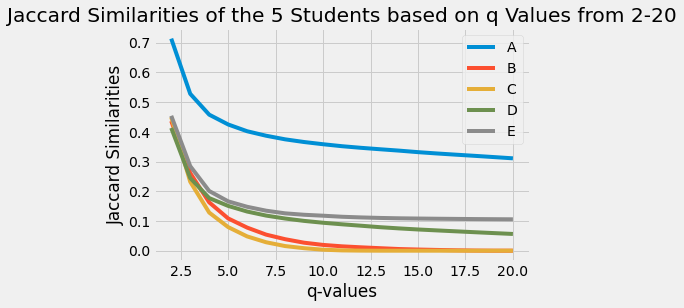

In [106]:
# the code to draw the plot
plt.plot(plag)
plt.xlabel('q-values')
plt.ylabel('Jaccard Similarities')
plt.legend(plag)
plt.title('Jaccard Similarities of the 5 Students based on q Values from 2-20')

#### Question 4

What do the similarity values you calculated say about the five students (A,B,C, D and E)? Is there evidence for plagiarism for any of them? Write a short discussion of your findings.


The Jaccard similarity values suggest that Student A may have plagiarised the Wikipedia entry on PageRank. At all q values the Jaccard similarity of Student A's handiwork is much higher than each other student. For the other students, they all have a similar Jaccard similarity of between 0.4 and 0.5, which is expected because many words (with spaces included) share 2 characters. The Jaccard similarity when q is 20 is below or close to 0.1 for these students, which is reasonable given that they are trying to describe the same subject as in the Wikipedia entry. Nevertheless, a Jaccard similarity of more than 0 for q value 20 may justify a review for plagirism. 

#### Question 5

Assume that the original text is fixed, but that different amounts of it are plagiarized.  How does the length of the plagiarized text impact the Jaccard similarities? For example, would a plagiarized short paper (1-2 sentences) typically have a different Jaccard similarity than a plagiarized long paper (few paragraphs)? Is this important for our five student scenario?

This is an open-ended question. You can answer it by changing the length of a plagiarized text and calculating similarities, you can argue it mathematically, or you can do some combination of these. 



In [119]:
# if you use code to make your argument put it here
print(jaccard_simq('abcdefghij','abc',2, True))
print(jaccard_simq('abcdefghij','abcd',2))
print(jaccard_simq('abcdefghij','abcde',2))
print(jaccard_simq('abcdefghij','abcdef',2))
print(jaccard_simq('abcdefghij','abcdefgh',2, True))

set1 = {'j ', 'bc', 'de', 'gh', 'ij', 'ef', 'fg', 'ab', 'cd', ' a', 'hi'}
set2 = {'bc', ' a', 'ab', 'c '}
Intersection = {'ab', ' a', 'bc'}
Union = {'j ', 'bc', 'de', 'gh', 'ij', 'ef', 'fg', 'c ', 'ab', 'cd', ' a', 'hi'}
Common Tokens = 3 Total Tokens = 12
0.25
0.3333333333333333
0.4166666666666667
0.5
set1 = {'j ', 'bc', 'de', 'gh', 'ij', 'ef', 'fg', 'ab', 'cd', ' a', 'hi'}
set2 = {'bc', 'de', 'gh', 'ef', 'fg', 'ab', 'h ', 'cd', ' a'}
Intersection = {'bc', 'de', 'gh', 'ef', 'fg', 'ab', 'cd', ' a'}
Union = {'j ', 'de', 'gh', 'ij', 'ef', 'fg', 'h ', ' a', 'bc', 'ab', 'cd', 'hi'}
Common Tokens = 8 Total Tokens = 12
0.6666666666666666


The length of the plagiarized text does impact the Jaccard similarities. In the above microcosmic example, increasing the plagiarised characters increases the Jaccard similarity by a noticeable amount. This also makes sense mathematically because the Jaccard similarity is calculated by dividing the intersection of q-length characters between the two texts by the union. Having longer plagiarised pieces increases the intersection of q-length characters, without changing the union, meaning that the Jaccard similarity necessarily increases.  
This is not important to our five student scenario because we were checking for evidence of plagirism and not necesarily how much was plagiarised. 